In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [21]:
import sys
sys.path.append("../") 

from utils.info import heroes, publishers, wts

# 13.2.0 Timing and profiling code

## 13.2.2 Using %timeit: your turn!

In [2]:
# Create a list of integers (0-50) using list comprehension
nums_list_comp = [num for num in range(51)]
print(nums_list_comp)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [7]:
# Create a list of integers (0-50) by unpacking range
nums_unpack = [*range(51)]
print(nums_unpack)

509 ns ± 19.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [8]:
%timeit [num for num in range(51)]

2.04 µs ± 657 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%timeit [*range(51)]

691 ns ± 136 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Question:

Use %timeit within your IPython console (i.e. not within the script.py window) to compare the runtimes for creating a list of integers from 0 to 50 using list comprehension vs. unpacking the range object. Don't include the print() statements when timing.

Which method was faster?

R:/ Unpacking the range object was faster than list compenhension. You used %timeit to gather and compare runtimes! Although list comprehension is a useful and powerful tool, sometimes unpacking an object can save time and looks a little cleaner.

## 13.2.3 Using %timeit: specifying number of runs and loops

In [11]:
%timeit -r5 -n25 set(heroes)

20.6 µs ± 3.29 µs per loop (mean ± std. dev. of 5 runs, 25 loops each)


R:/ %timeit lets you specify the number of runs and number of loops you want to consider with the -r and -n flags. You can use -r5 and -n25 to specify 5 iterations each with 25 loops when calculating the average and standard deviation of runtime for your code.

## 13.2.4 Using %timeit: formal name or literal syntax

In [8]:
# Create a list using the formal name
formal_list = list()
print(formal_list)

# Create a list using the literal syntax
literal_list = []
print(literal_list)

[]
[]


In [9]:
# Print out the type of formal_list
print(type(formal_list))

# Print out the type of literal_list
print(type(literal_list))

<class 'list'>
<class 'list'>


Question
Use %timeit in your IPython console to compare runtimes between creating a list using the formal name (list()) and the literal syntax ([]). Don't include the print() statements when timing.

Which naming convention is faster?

R:/ Using the literal syntax ([]) to create a list is faster.  Using Python's literal syntax to define a data structure can speed up your runtime. Consider using the literal syntaxes (like [] instead of list(), {} instead of dict(), or () instead of tuple()), where applicable, to gain some speed.

## 13.2.5 Using cell magic mode (%%timeit)

In [15]:
%%timeit 
hero_wts_lbs = []
for wt in wts:
    hero_wts_lbs.append(wt * 2.20462)

21.6 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [16]:
%%timeit
wts_np = np.array(wts)
hero_wts_lbs_np = wts_np * 2.20462

31.6 µs ± 4 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


R:/ The numpy technique was faster. You used %%timeit (_cell magic mode_) to time multiple lines of code. Converting the wts list into a NumPy array and taking advantage of NumPy array broadcasting saved you some time! Moving forward, remember that you can use %timeit to gather runtime for a single line of code (_line magic mode_) and %%timeit to get the runtime for multiple lines of code.

## 13.2.6 Pop quiz: steps for using %lprun

Below is the convert_units() function, which converts the heights and weights of our favorite superheroes from metric units to Imperial units.

In [ ]:
def convert_units(heroes, heights, weights):

    new_hts = [ht * 0.39370  for ht in heights]
    new_wts = [wt * 2.20462  for wt in weights]

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data

uppose you have a list of superheroes (named heroes) along with each hero's height (in centimeters) and weight (in kilograms) loaded as NumPy arrays (named hts and wts respectively).

What are the necessary steps you need to take in order to profile the convert_units() function acting on your superheroes data if you'd like to see line-by-line runtimes?

R:/ The first and second options from above are necessary. Now that you've reviewed the necessary steps for profiling a function for runtime, it's time for you to practice profiling on your own!

## 13.2.7 Using %lprun: spot bottlenecks

In [17]:
def convert_units(heroes, heights, weights):

    new_hts = [ht * 0.39370  for ht in heights]
    new_wts = [wt * 2.20462  for wt in weights]

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data

Question 
What percentage of time is spent on the new_hts list comprehension line of code relative to the total amount of time spent in the convert_units() function?

R:/ 11% - 20% 

## 13.2.8 Using %lprun: fix the bottleneck

In [ ]:
def convert_units_broadcast(heroes, heights, weights):

    # Array broadcasting instead of list comprehension
    new_hts = heights * 0.39370
    new_wts = weights * 2.20462

    hero_data = {}

    for i,hero in enumerate(heroes):
        hero_data[hero] = (new_hts[i], new_wts[i])

    return hero_data

Question
What percentage of time is spent on the new_hts array broadcasting line of code relative to the total amount of time spent in the convert_units_broadcast() function?

R:/ 0% - 10%

## 13.2.10 Pop quiz: steps for using %mprun

Question
What are the necessary steps you need to take in order to profile the convert_units() function acting on your superheroes data if you'd like to see the line-by-line memory consumption of convert_units()?

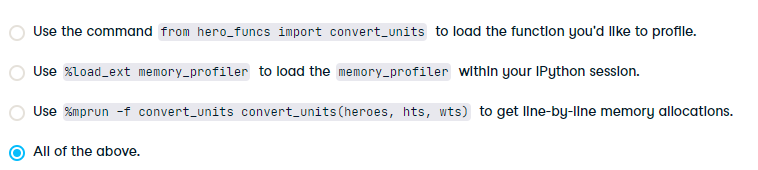

R:/ using %mprun requires one additional step compared to using %lprun (i.e., you need to import the function in order to use %mprun on it). 

## 13.2.11 Using %mprun: Hero BMI

In [ ]:
def calc_bmi_lists(sample_indices, hts, wts):

    # Gather sample heights and weights as lists
    s_hts = [hts[i] for i in sample_indices]
    s_wts = [wts[i] for i in sample_indices]

    # Convert heights from cm to m and square with list comprehension
    s_hts_m_sqr = [(ht / 100) ** 2 for ht in s_hts]

    # Calculate BMIs as a list with list comprehension
    bmis = [s_wts[i] / s_hts_m_sqr[i] for i in range(len(sample_indices))]

    return bmis

Question 
How much memory do the list comprehension lines of code consume in the calc_bmi_lists() function? (i.e., what is the total sum of the Increment column for these four lines of code?)

R:/ 0.1 MIB - 2.0 MIB

## 13.2.12 Using %mprun: Hero BMI 2.0

In [ ]:
def calc_bmi_arrays(sample_indices, hts, wts):

    # Gather sample heights and weights as arrays
    s_hts = hts[sample_indices]
    s_wts = wts[sample_indices]

    # Convert heights from cm to m and square with broadcasting
    s_hts_m_sqr = (s_hts / 100) ** 2

    # Calculate BMIs as an array using broadcasting
    bmis = s_wts / s_hts_m_sqr

    return bmis

Question 
How much memory do the array indexing and broadcasting lines of code consume in the calc_bmi_array() function? (i.e., what is the total sum of the Increment column for these four lines of code?)

R:/ 0.1 MIB - 2.0 MIB

## 13.2.13 Bringing it all together: Star Wars profiling

In [19]:
def get_publisher_heroes(heroes, publishers, desired_publisher):

    desired_heroes = []

    for i,pub in enumerate(publishers):
        if pub == desired_publisher:
            desired_heroes.append(heroes[i])

    return desired_heroes

def get_publisher_heroes_np(heroes, publishers, desired_publisher):

    heroes_np = np.array(heroes)
    pubs_np = np.array(publishers)

    desired_heroes = heroes_np[pubs_np == desired_publisher]

    return desired_heroes

In [23]:
# Use get_publisher_heroes() to gather Star Wars heroes
star_wars_heroes = get_publisher_heroes(heroes, publishers, 'George Lucas')

print(star_wars_heroes)
print(type(star_wars_heroes))

# Use get_publisher_heroes_np() to gather Star Wars heroes
star_wars_heroes_np = get_publisher_heroes_np(heroes, publishers, 'George Lucas')

print(star_wars_heroes_np)
print(type(star_wars_heroes_np))

['Darth Vader', 'Han Solo', 'Luke Skywalker', 'Yoda']
<class 'list'>
['Darth Vader' 'Han Solo' 'Luke Skywalker' 'Yoda']
<class 'numpy.ndarray'>


Question
Within your IPython console, load the line_profiler and use %lprun to profile the two functions for line-by-line runtime. When using %lprun, use each function to gather the Star Wars heroes as you did in the previous step. After you've finished profiling, answer the following question:

R:/ get_publisher_heroes_np() Is faster

Question
Within your IPython console, load the memory_profiler and use %mprun to profile the two functions for line-by-line memory consumption.

R:/ Both functions have the same memory consumption

Question
Based on your runtime profiling and memory allocation profiling, which function would you choose to gather Star Wars heroes?

R:/ I would use get_publisher_heroes_np()

In [6]:
print('Ok_')

Ok_
